# Local updates MCMC

In [1]:
from __future__ import annotations

import math
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

import actions
import mcmc
import transforms
import utils

PI = math.pi

%load_ext lab_black

INFO:blib2to3.pgen2.driver:Generating grammar tables from /home/joe/.miniconda3/envs/xy/lib/python3.9/site-packages/blib2to3/Grammar.txt
INFO:blib2to3.pgen2.driver:Writing grammar tables to /home/joe/.cache/black/22.1.0/Grammar3.9.7.final.0.pickle
INFO:blib2to3.pgen2.driver:Writing failed: [Errno 2] No such file or directory: '/home/joe/.cache/black/22.1.0/tmpogk6fuug'
INFO:blib2to3.pgen2.driver:Generating grammar tables from /home/joe/.miniconda3/envs/xy/lib/python3.9/site-packages/blib2to3/PatternGrammar.txt
INFO:blib2to3.pgen2.driver:Writing grammar tables to /home/joe/.cache/black/22.1.0/PatternGrammar3.9.7.final.0.pickle
INFO:blib2to3.pgen2.driver:Writing failed: [Errno 2] No such file or directory: '/home/joe/.cache/black/22.1.0/tmpllaf4irp'


In [2]:
LATTICE_SHAPE = [10, 10]
COUPLING_STRENGTH = 0.8
INIT_CONFIG = torch.empty(LATTICE_SHAPE).uniform_(-PI, PI)
N_SWEEPS = 10000

In [3]:
samplers = {
    "metropolis": mcmc.MetropolisSampler,
    "heat bath": mcmc.HeatbathSampler,
    "checker": mcmc.CheckerboardGibbsSampler,
    "auxvars": mcmc.HubbardStratonovichGibbsSampler,
}

metropolis : 	 <E> = -83.2 +/- 0.6 	 <m^2> = 2.47e+03 +/- 8e+01 	 tau = 14
heat bath : 	 <E> = -80.8 +/- 0.4 	 <m^2> = 2.25e+03 +/- 4e+01 	 tau = 5.4
checker : 	 <E> = -82.1 +/- 0.3 	 <m^2> = 2.34e+03 +/- 4e+01 	 tau = 4.2
auxvars : 	 <E> = -82.8 +/- 0.5 	 <m^2> = 2.43e+03 +/- 6e+01 	 tau = 12


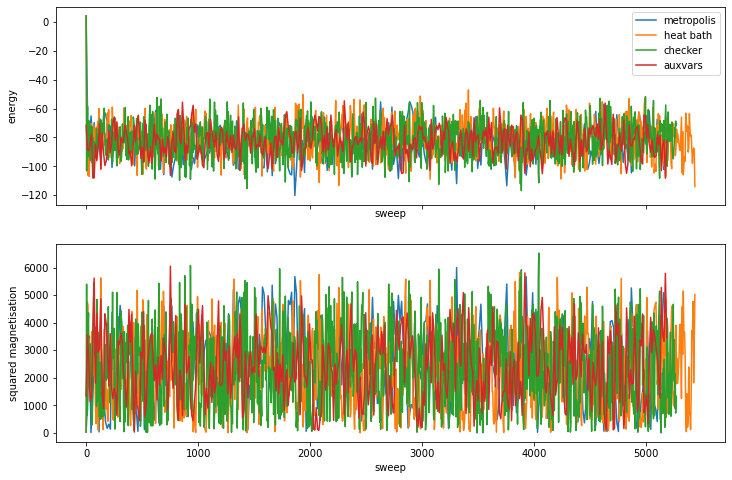

In [4]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))
ax1.set_xlabel("sweep")
ax2.set_xlabel("sweep")
ax1.set_ylabel("energy")
ax2.set_ylabel("squared magnetisation")


def value_with_error(tensor):
    return f"{float(tensor.mean()):.3g} +/- {float(tensor.std()) / math.sqrt(len(tensor)):.1g}"


for label, Sampler in samplers.items():
    sampler = Sampler(INIT_CONFIG, COUPLING_STRENGTH)
    sampler.sample(N_SWEEPS)
    energy = torch.Tensor(sampler.history["energy"])
    mag_sq = torch.Tensor(sampler.history["magnetisation_sq"])
    tau = utils.integrated_autocorrelation(energy)
    energy = energy[:: int(2 * tau)]
    mag_sq = mag_sq[:: int(2 * tau)]
    step = [i * tau for i in range(len(energy))]

    ax1.plot(step, energy.tolist(), label=label)
    ax2.plot(step, mag_sq.tolist(), label=label)

    print(
        f"{label} : \t <E> = {value_with_error(energy)} \t <m^2> = {value_with_error(mag_sq)} \t tau = {tau:.2g}"
    )

ax1.legend()
plt.show()